In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import os
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


In [3]:
data=pd.read_csv("time_series_data_human_activities.csv")
data.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [4]:
#Splitting data
tmp=data.groupby('activity')['user'].unique()
l=[]
for i in tmp.keys():
    l.append(tmp[i])
from functools import reduce
comm=list(reduce(lambda i, j: i & j, (set(n) for n in l)))


In [5]:
def convert_float(x):
    a=x.real
    b=x.imag
    val=a+b 
    return val

416

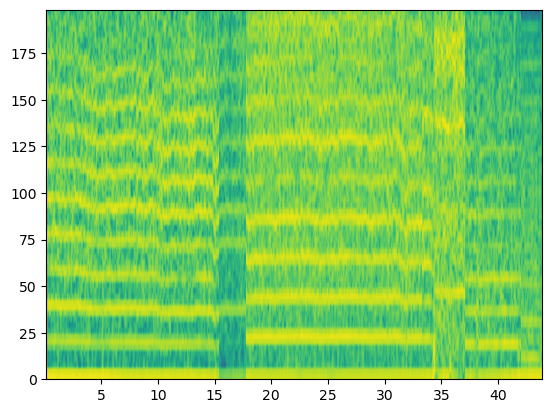

In [5]:
all=[]
for i in tmp.keys():
    for j in tmp[i]:
        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])#129:416 #
        #x_plt=np.fft.fft(X)
        #all.append(len(x_plt))
        all.append(x_plt.shape[1])
min_len=min(all)
min_len

/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_80724/1277849396.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_80724/1277849396.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_80724/1277849396.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

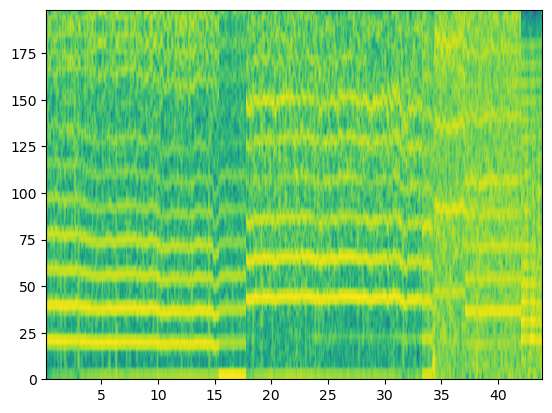

In [6]:
all=[]
df = pd.DataFrame()
for i in tmp.keys():
    for j in tmp[i]:
        xyz=[]
        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
        Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
        y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
        Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
        z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
        xyz=np.concatenate((x_plt,y_plt,z_plt))
        cur=xyz.flatten(order='F').tolist()
        cur.append(i)
        df[i+str(j)]=cur       

In [7]:
df

,Downstairs1,Downstairs3,Downstairs4,Downstairs5,Downstairs6,Downstairs7,Downstairs8,Downstairs10,Downstairs11,Downstairs12,...,Walking27,Walking28,Walking29,Walking30,Walking31,Walking32,Walking33,Walking34,Walking35,Walking36
0,0.987685,4.774373,2.803214,0.204795,0.001642,9.547809,0.284593,0.333945,5.28194,0.141479,...,2.679551,0.011041,4.230765,14.55461,0.023521,0.087016,0.000578,0.085896,2.965157,0.468008
1,0.305623,2.560982,1.669704,0.107707,0.100159,4.83029,0.29509,0.229226,2.850085,0.11215,...,1.39053,0.044312,2.148384,7.71884,0.012633,0.067401,0.00141,0.075191,1.471704,0.239094
2,0.045049,0.022348,0.00422,0.00021,0.019745,0.010427,0.155119,0.010381,0.000647,0.004889,...,0.001329,0.057984,0.002806,0.003501,0.00646,0.004206,0.000983,0.00422,0.000157,0.002158
3,0.053702,0.030216,0.01024,0.005805,0.004266,0.012651,0.006166,0.000128,0.030613,0.014029,...,0.003266,0.04007,0.001093,0.035492,0.03503,0.001915,0.00068,0.004197,0.00296,0.000753
4,0.009457,0.026203,0.004596,0.021765,0.027669,0.046981,0.034881,0.026107,0.07016,0.024004,...,0.000971,0.121169,0.001109,0.064376,0.052435,0.009082,0.000987,0.003489,0.004297,0.001301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81116,0.021917,0.029051,0.021067,0.045419,0.000605,0.011689,0.011567,0.006294,0.000378,0.235807,...,0.006384,0.00014,0.013404,0.013321,0.005199,0.005737,0.040843,0.052338,0.038653,0.000121
81117,0.026205,0.009667,0.031402,0.028756,0.004326,0.0018,0.015674,0.09902,0.00031,0.474947,...,0.001539,0.004838,0.001489,0.004171,0.006368,0.002088,0.045817,0.009857,0.020046,0.026895
81118,0.018653,0.063866,0.01948,0.024845,0.007598,0.013588,0.007015,0.072688,0.000246,0.425897,...,0.005229,0.006845,0.006874,0.006064,0.006385,0.031654,0.0367,0.023571,0.000908,0.015313
81119,0.045344,0.279307,0.007809,0.005949,0.00664,0.004943,0.018107,0.002404,0.000287,0.122128,...,0.001807,0.001174,0.010064,0.016264,0.015021,0.065067,0.010841,0.0565,0.000498,0.02091


In [8]:
label=df.to_numpy()[-1]
dp=df.to_numpy()[:-1]

In [57]:
len(label)

179

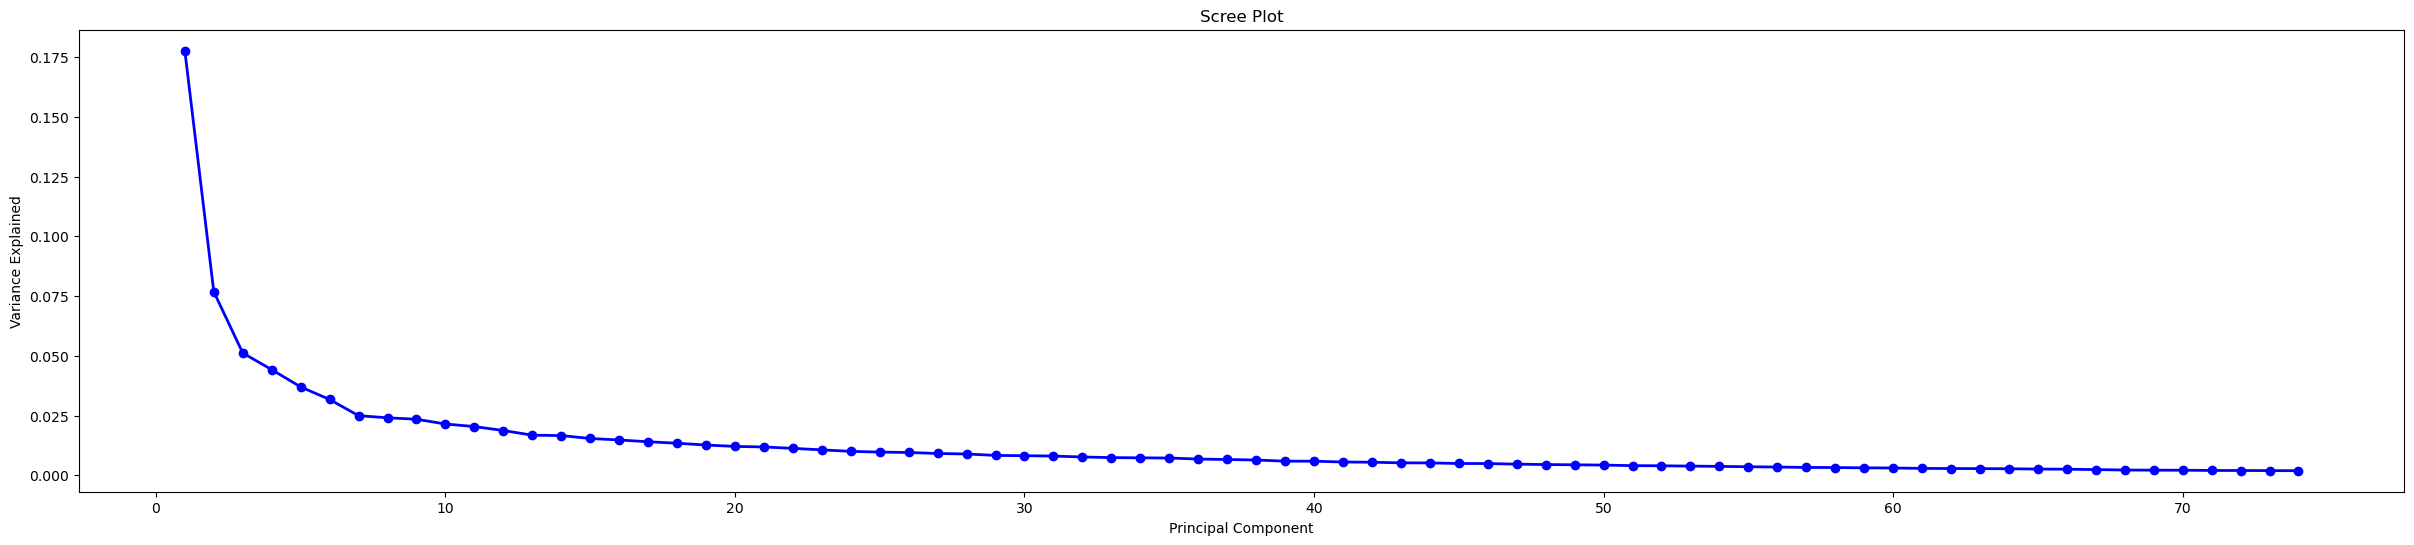

In [70]:
scaler = MinMaxScaler()
data_pca=dp.T
data_rescaled = scaler.fit_transform(data_pca)
pca = PCA(n_components=0.95).fit(data_rescaled)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

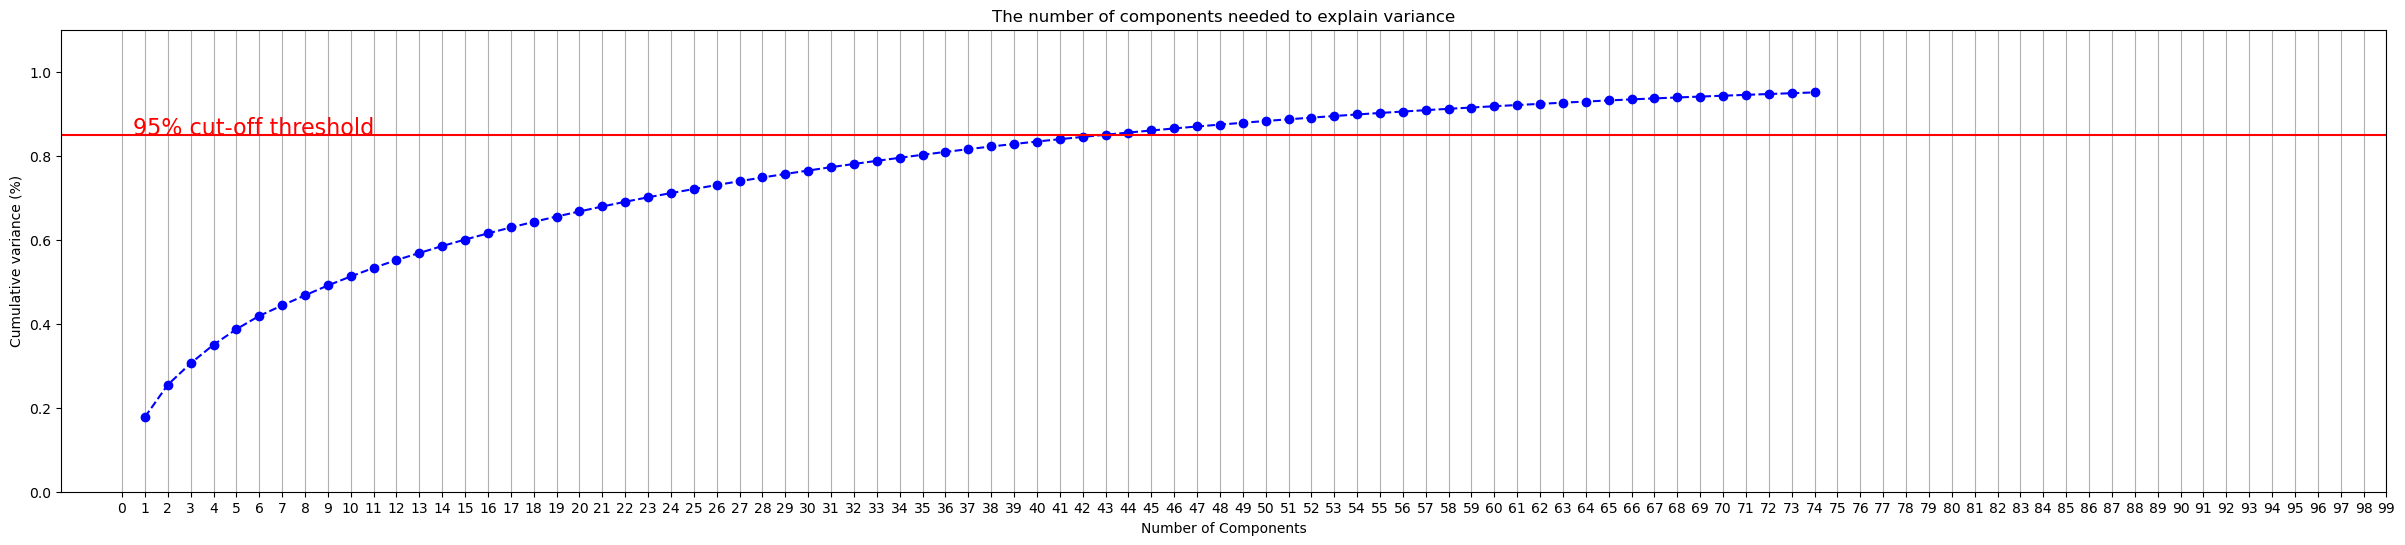

In [71]:
# % matplotlib inline
plt.rcParams["figure.figsize"] = (30,6)

fig, ax = plt.subplots()
xi = np.arange(pca.n_components_) + 1
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 100, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [72]:
dp_pca=pca.fit_transform(data_rescaled)

In [73]:
dp_pca.shape

(179, 74)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(dp_pca,label,test_size=0.3)

In [75]:
x_train.shape

(125, 74)

In [76]:
x_test.shape

(54, 74)

In [77]:
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


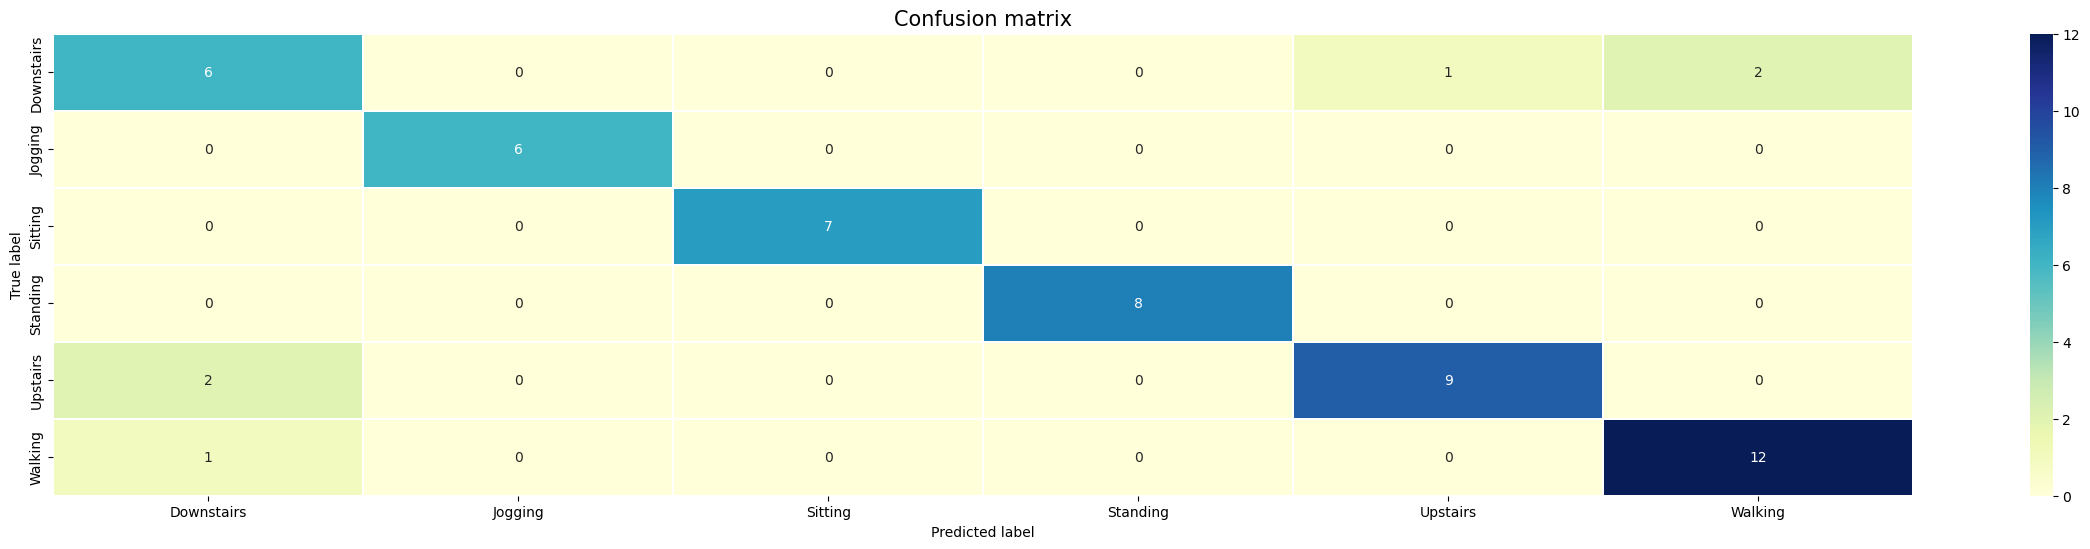

In [83]:
from sklearn.metrics import confusion_matrix
labels = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()